# Clasificación Decision Tree (DT)

Mateo Rosero

## Explicaciones Clave
**Sobre el dataset:** ``car_data.csv`` contiene datos para determinar si un cliente comprará un automóvil (1) o no (0) en base a dos variables independientes:
- _Age_ --> Edad del cliente en años.
- _AnnualSalary_ --> Salario anual del cliente. <br>

**Entrenamiento del modelo:** Se utilizará la librería de ``skearn`` para poder implementar el algoritmo de Clasificación por Árboles de Decisión (DT).

# Importar Librerías Necesarias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from matplotlib.colors import ListedColormap

# Importar el Dataset

In [2]:
dataset = pd.read_csv('car_data.csv')

# Definición de Variable Independiente y Dependiente

In [3]:
X = dataset[['Age', 'AnnualSalary']].values  # Extrae las variables independientes
y = dataset['Purchased'].values  # Extrae la variable dependiente

En este dataset, la decisión de un cliente de comprar o no un coche está dada según su edad y salario anual. Por esta razón, esta variable cualitativa dicotómica es la variable dependiente y las variables numéricas son variables independientes.

# División entre Conjunto de Entrenamiento y Conjunto de Prueba

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Escalado de Características (Feature Scaling)

In [5]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Entrenando el Modelo Decision Tree sobre el Conjunto de Entrenamiento usando GridSearchCV

In [6]:
# Código Original de Entrenamiento
# classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
# classifier.fit(X_train, y_train)

# Paso 1: Definir los parámetros a probar
param_grid = {'max_depth': range(1, 20)}
# Paso 2: Usar GridSearchCV con criterio 'entropy'
grid = GridSearchCV(
    estimator=DecisionTreeClassifier(criterion='entropy', random_state=0),
    param_grid=param_grid,
    cv=5
)
# Paso 3: Ajustar sobre el conjunto de entrenamiento
grid.fit(X_train, y_train)
# Paso 4: Extraer el mejor modelo directamente
classifier = grid.best_estimator_
# Ver la mejor profundidad encontrada
print("Mejor profundidad encontrada:", grid.best_params_['max_depth'])

Mejor profundidad encontrada: 5


Usar **GridSearchCV** con un rango de valores para ```max_depth``` en lugar de ajustar directamente un _DecisionTreeClassifier_ permite encontrar automáticamente la profundidad óptima del árbol mediante validación cruzada, lo que mejora el rendimiento del modelo y reduce el riesgo de sobreajuste o subajuste. Mientras que ```classifier.fit(X_train, y_train)``` entrena un único árbol con una profundidad fija (o ilimitada por defecto), GridSearchCV prueba varias profundidades, evalúa cada modelo usando múltiples particiones del conjunto de entrenamiento (```cv=5```), y selecciona el modelo que mejor generaliza según la métrica elegida. Esto hace que el modelo final (```grid.best_estimator_```) sea más robusto y confiable para predecir sobre datos nuevos.

# Predicciones

## Sobre un nuevo resultado

**Ejemplo:** Predicción de compra de un cliente de 48 años y un salario anual de $96000

In [7]:
resultado = classifier.predict(sc.transform([[48, 96000]]))
print(f"Predicción para edad 48 y salario 96000: {resultado}")

Predicción para edad 48 y salario 96000: [1]


En este caso, el cliente sí comprará el auto.

## Sobre el Conjunto de Prueba

In [8]:
y_pred = classifier.predict(X_test)  # Predice las etiquetas para el conjunto de prueba
print("Predicciones sobre el conjunto de prueba:")
print("Valores Predichos vs. Valores Reales")
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))  # Compara las predicciones con las etiquetas reales

Predicciones sobre el conjunto de prueba:
Valores Predichos vs. Valores Reales
[[1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 

# ANÁLISIS

# Matriz de Confusión

La matriz de confusión muestra el desempeño del modelo comparando las predicciones con las etiquetas reales. Permite ver los aciertos (TP, TN) y los errores (FP, FN) del modelo.
Para evaluarlo, se cuenta cuántas observaciones se clasificaron correctamente o incorrectamente.
- Un buen modelo tendrá valores altos en la diagonal principal.

In [9]:
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(cm)

Matriz de Confusión:
[[142  10]
 [ 16  82]]


En base a la matriz, el modelo clasificó correctamente 142 casos negativos y 82 positivos, mientras que se equivocó en 10 falsos positivos y 16 falsos negativos. A pesar de estos errores, _**el modelo tiene una buena clasificación general**_, pues solo se tienen 26 errores de los 250 datos usados.

# Accuracy

Mide el porcentaje total de predicciones correctas del modelo sobre el total de las muestras. Su evaluación es dada por un número entre 0 y 1, mientras más cercano a 1 (o 100%), mejor es el desempeño del modelo en general.

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión Global (Accuracy): {accuracy:.4f}")

Precisión Global (Accuracy): 0.8960


Esta métrica nos dice que el modelo acierta en el **_89.6%_** de los casos, lo cual, apoyado con la resolución de la matriz de confusión, concluye en que **_el modelo tiene un buen desempeño general_**, pues realiza predicciones confiables.

# Precision

Es una métrica que mide cuántas de las muestras clasificadas como positivas realmente lo son (verdaderos positivos).<br>
Su interpretación se realiza de la siguiente manera:
- **Precision alta (> 0.7):** El modelo tiene un _**bajo número de falsos positivos**_. Es decir, cuando predice que algo es positivo, generalmente tiene razón.
- **Precision baja (< 0.5):** El modelo está haciendo _**muchos falsos positivos**_. En estos casos, el modelo tiende a etiquetar incorrectamente como positivos muchos ejemplos negativos, lo que puede ser un problema si la consecuencia de un falso positivo es costosa, como los casos de arrestar a una persona inocente o diagnosticar erróneamente una enfermedad.

In [11]:
precision = precision_score(y_test, y_pred)
print(f"Precisión (Precision): {precision:.4f}")

Precisión (Precision): 0.8913


En base al resultado, el _**89.13% de las veces que el modelo predijo que alguien compraría un carro, acertó**_.

# Recall (Sensibilidad)

El recall o sensibilidad mide la capacidad del modelo para identificar correctamente los positivos reales.<br>
Su interpretación es la siguiente:
- **Recall alto (> 0.7):** El modelo es _**bueno para detectar casos positivos**_. Es decir, tiene una baja tasa de falsos negativos, lo que es crucial cuando un falso negativo es muy costoso.
- **Recall bajo (< 0.5):** El modelo está _**pasando por alto muchos casos positivos**_, lo cual puede ser peligroso en contextos donde no detectar algo realmente importante podría tener consecuencias graves, como no detectar una enfermedad o no detectar un fraude.

In [12]:
recall = recall_score(y_test, y_pred)
print(f"Recall (Sensibilidad): {recall:.4f}")

Recall (Sensibilidad): 0.8367


Lo obtenido en la métrica establece que _**el modelo detecta correctamente el 83.67% de los casos en los que un cliente realmente compra un vehículo**_.

# F1 Score

Es un promedio que combina precisión y recall en una sola métrica balanceada.<br>
Su evaluación se realiza así:
- Se calcula con la fórmula ```2 * (Precision * Recall) / (Precision + Recall)```.
- **F1-Score alto (> 0.7):** El modelo tiene un buen balance entre precision y recall. Es ideal en situaciones donde quieres equilibrar ambas métricas y no quieres que el modelo se incline demasiado hacia un lado (precision o recall).
- **F1-Score bajo (< 0.5):** Esto indica que el modelo tiene un equilibrio pobre entre precision y recall, lo que generalmente significa que está fallando en al menos una de las dos métricas. Esto es un indicio de que el modelo no está funcionando bien en general.

In [13]:
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

F1-Score: 0.8632


El F1 Score nos indica que el modelo tiene un buen equilibrio entre precisión y calidad, pues su valor es de _**86.32%**_, lo que indica un _**buen equilibrio entre precisión y sensibilidad las métricas de precisión y recall**_.

# Curva ROC & Área bajo la Curva ROC (AUC)

Por un lado, la Curva ROC (_Receiver Operating Characteristic_), es una gráfica que muestra cómo cambia el modelo si se ajusta el umbral de clasificación, teniendo al eje X como la Tasa de Falsos Positivos (FPR) y al eje Y como la Tasa de Verdaderos Positivos (TPR). Una curva más cerca de la esquina superior izquierda indica que es un mejor modelo.<br>
Generalmente, si hay una _**curva cerca de la esquina superior izquierda**_, el modelo tiene una alta capacidad de discriminación, lo que significa que es muy bueno para separar las clases (Cuanto más hacia la esquina superior izquierda, mejor), y cuando hay una **_curva cerca de la diagonal (línea punteada)_**, esto indica un modelo que tiene un rendimiento similar al azar (AUC cercano a 0.5), por lo que no está discriminando bien las clases.

Por otro lado, la Área bajo la curva ROC (_AUC_) resume la ROC con un número entre 0 y 1. Mientras más cercano a 1, mejor el modelo distingue entre las clases. <br>
Se interpreta de la siguiente forma:
- **AUC alto (> 0.8):** El modelo tiene una excelente capacidad para separar las clases. Cuanto más cerca de 1, mejor.
- **AUC cercano a 0.5:** El modelo es prácticamente aleatorio y no tiene capacidad de discriminación.
- **AUC bajo (< 0.6):** El modelo tiene una muy baja capacidad de discriminación y probablemente no sea útil.

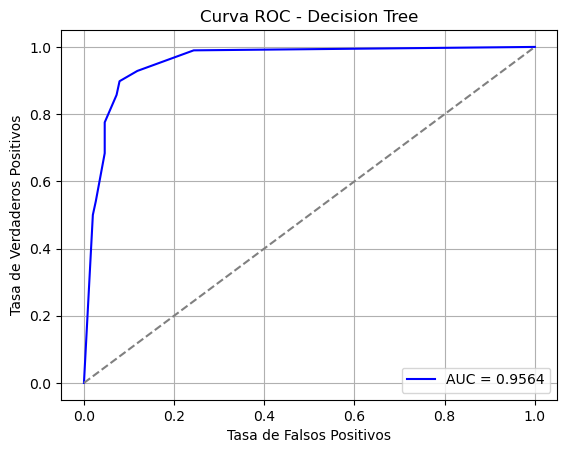

AUC: 0.9564


In [14]:
y_prob = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Decision Tree')
plt.legend()
plt.grid()
plt.show()

print(f"AUC: {auc:.4f}")

- Gráficamente, la curva tiene una forma óptima, en la que se encuentra más cerca a la esquina superior izquierda, indicando que hay una _**buena capacidad de discriminación entre los clientes que compran un auto y los que no lo hacen**_.
- Estadísticamente, _**el modelo tiene una excelente capacidad de distinguir entre clientes que comprarán un auto y los que no**_, pues tiene una probabilidad del _**95.64%**_ de discriminación acertada. Esto refuerza aún más la evidencia gráfica de la Curva ROC

# Profundidad del Árbol

La profundidad del árbol representa el número máximo de niveles del modelo, y se evalúa de la siguiente manera:
- Un **árbol más profundo** es **más complejo** y puede haber sobreajuste (**Overfitting**).
- Un **árbol menos profundo** es **menos complejo** y hay posibilidad de que haya subajuste (**Underfitting**).

In [15]:
print("Profundidad del Árbol:")
print(classifier.get_depth())

Profundidad del Árbol:
5


Gracias al uso de ```GridSearchCV``` para obtener el valor óptimo para la profundidad del modelo (```grid.best_estimator_```), se determinó que el **árbol con profundidad 5 es el mejor**, pues tiene una profundidad que _evita el Underfitting y el Overfitting_, ayudando a **mantener el balance entre _Precisión_ y _Generalización_**.

# Número de Hojas

Las hojas son los nodos terminales del árbol. Se requiere evaluarlos en conjunto con otras características como la profundidad del árbol, el accuracy del modelo, entre otras, para determinar si es un modelo confiable o no.
- Más hojas pueden indicar un árbol sobreajustado.

In [16]:
print("Número de hojas del árbol:")
print(classifier.get_n_leaves())

Número de hojas del árbol:
20


El hecho de que el modelo tenga 20 hojas implica que **_el árbol está tomando 20 decisiones distintas sobre cómo clasificar los datos_**. Se requiere evaluar junto a otras métricas que ya se han calculado en la práctica.

# Importancia de Características

Esta métrica indica qué tan relevante fue cada variable para las divisiones del árbol.

In [17]:
features = ['Age', 'AnnualSalary']
importancias = classifier.feature_importances_

for feature, importance in zip(features, importancias):
    print(f"{feature}: {importance:.4f}")

Age: 0.4849
AnnualSalary: 0.5151


En base a las dos variables independientes del modelo, se podría decir que el _**salario anual (0.51) tuvo un mayor peso en la decisión del árbol que la edad (0.48)**_, aunque su _diferencia no es mucha_, por lo que **ambas variables son importantes para poder tomar decisiones de manera acertada**.

# CONCLUSIONES

Para resumir, las variables de Edad y Salario Anual de un cliente eran determinantes para clasificar si este compraría o no un coche, por lo que se las estableció como variables independientes, y a esta decisión de compra como variable dependiente, debido a que estas dos primeras no tienen relación entre sí y la combinación de ellas influye en el cliente al momento de comprar un vehículo. Por otro lado, las métricas analizadas arrojaron los siguientes resultados:
- Al tener un **Accuracy o Precisión Global del 89.6% para la calidad de las predicciones del modelo**, sumado a que, en la **Matriz de Confusión**, **solo se equivocó 26 veces de un total de 250**, podemos concluir que _**el modelo tiene un buen rendimiento a nivel general**_. Además, apoyado en otras métricas como la Precisión (89.1%) y Sensibilidad (83.67%), las cuales son evaluadas en el F1 Score (86.32%), se respalda este argumento, pues sus valores indican un buen balance entre las primeras dos, significando que, _**en la discriminación del modelo, hay pocos casos de falsos positivos y una buena detección de verdaderos positivos**_.
- Por otro lado, la __Curva ROC y su Área bajo la Curva (95.64%) resaltan la capacidad de discriminación correcta del modelo para sus casos__.
- El _**árbol**_, al tener una profundidad de 5 y 20, indica que es _**moderadamente complejo**_, un aspecto positivo dado que el AUC y las métricas de precisión y recall son altas. Adicionalmente, esto nos indica que _**existe una generalización razonable de datos**_, pues el árbol no es tan profundo como para sobreajustar, y aún así está haciendo divisiones útiles.
- Finalmente, con un solo árbol de decisión se concluye que _**la variable más influyente en la compra de un vehículo por parte de un cliente es su Salario Anual, con un valor de 0.51; aunque, la Edad no se queda atrás, pues tiene un valor de 0.48**_, siendo una diferencia mínima entre la importancia de estas dos variables. Esto es indicador de que ambas son importantes para el modelo.